In [7]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt


In [8]:
# Definir el número de registros
n = 100
np.random.seed(42) # Para resultados repetibles

data = {
    'interaccion_id': range(1, n + 1),
    # Distribución de tráfico (ej. 45% Social, 20% Orgánico, 10% Referido, 25% Directo)
    'origen_trafico': np.random.choice(['Social (IG)', 'Orgánico (SEO)', 'Referido', 'Directo'], n, 
                                        p=[0.45, 0.20, 0.10, 0.25]),
    # Simulación de ciudades (mayoría local, pero buscando expansión)
    'ciudad_usuario': np.random.choice(['Los Mochis', 'Culiacán', 'Hermosillo', 'Guadalajara', 'CDMX'], n, 
                                       p=[0.50, 0.20, 0.15, 0.10, 0.05]),
    # Simulación de tiempo de sesión (más en Orgánico/Referido)
    'tiempo_sesion_seg': np.random.uniform(30, 300, n).round(2),
    # Simulación de páginas vistas (más en Orgánico/Referido)
    'paginas_vistas': np.random.randint(1, 10, n),
    # Simulación de acción de conversión (5% Solicitud de Contacto)
    'accion_conversion': np.random.choice(['Portafolio Visto', 'Ninguna', 'Contacto Solicitado'], n, 
                                            p=[0.50, 0.45, 0.05])
}

df = pd.DataFrame(data)

# Imprimir un resumen de los primeros registros y estadísticas clave (como en el ejemplo)
print("Resumen de las primeras 5 interacciones:")
print(df.head())
print("\nEstadísticas clave:")
print(df.describe())

Resumen de las primeras 5 interacciones:
   interaccion_id  origen_trafico ciudad_usuario  tiempo_sesion_seg  \
0               1     Social (IG)     Los Mochis             203.35   
1               2         Directo       Culiacán              52.72   
2               3        Referido     Los Mochis              73.64   
3               4  Orgánico (SEO)       Culiacán             272.61   
4               5     Social (IG)    Guadalajara             193.74   

   paginas_vistas accion_conversion  
0               4           Ninguna  
1               3           Ninguna  
2               7  Portafolio Visto  
3               8           Ninguna  
4               4           Ninguna  

Estadísticas clave:
       interaccion_id  tiempo_sesion_seg  paginas_vistas
count      100.000000         100.000000      100.000000
mean        50.500000         169.752400        4.570000
std         29.011492          79.224739        2.539605
min          1.000000          31.370000        1.00000

In [9]:
# Crear la métrica de 'Tasa de Interés'
df['tasa_interes'] = (df['tiempo_sesion_seg'] * df['paginas_vistas']) / 100

# Crear la métrica binaria 'es_conversion' (1 = Contacto Solicitado)
df['es_conversion'] = np.where(df['accion_conversion'] == 'Contacto Solicitado', 1, 0)

print("\nCálculo de Tasa de Interés y Conversión:")
print(df[['origen_trafico', 'tasa_interes', 'es_conversion']].head())


Cálculo de Tasa de Interés y Conversión:
   origen_trafico  tasa_interes  es_conversion
0     Social (IG)        8.1340              0
1         Directo        1.5816              0
2        Referido        5.1548              0
3  Orgánico (SEO)       21.8088              0
4     Social (IG)        7.7496              0


In [10]:
# Agrupar por origen de tráfico para calcular las métricas promedio
analisis_trafico = df.groupby('origen_trafico').agg(
    volumen=('interaccion_id', 'count'),
    tasa_interes_promedio=('tasa_interes', 'mean'),
    tasa_conversion_porc=('es_conversion', 'mean') # promedio de 1s y 0s es la tasa
).reset_index()

# Multiplicar la tasa de conversión por 100 para tener un porcentaje (ej. 0.085 -> 8.5)
analisis_trafico['tasa_conversion_porc'] = (analisis_trafico['tasa_conversion_porc'] * 100).round(2)

# Ordenar por Tasa de Conversión (para el insight de negocio)
analisis_trafico = analisis_trafico.sort_values(by='tasa_conversion_porc', ascending=False)

print("\n--- Resultados Clave por Origen de Tráfico ---")
print(analisis_trafico)


--- Resultados Clave por Origen de Tráfico ---
   origen_trafico  volumen  tasa_interes_promedio  tasa_conversion_porc
0         Directo       24               6.478079                 12.50
1  Orgánico (SEO)       19               9.133384                 10.53
3     Social (IG)       49               7.240351                  6.12
2        Referido        8               7.348537                  0.00


In [11]:
# Crear una columna binaria para usuarios 'fuera de Los Mochis'
df['es_fuera_mochis'] = np.where(df['ciudad_usuario'] != 'Los Mochis', 1, 0)

# Calcular el porcentaje de tráfico y conversiones fuera de la ciudad
trafico_fuera = df['es_fuera_mochis'].sum() / n * 100
conversiones_fuera = df[df['es_conversion'] == 1]['es_fuera_mochis'].sum()
total_conversiones = df['es_conversion'].sum()

print(f"\n--- Resultados Geográficos (Expansión) ---")
print(f"Porcentaje de Tráfico FUERA de Los Mochis: {trafico_fuera:.2f}%")
print(f"Conversiones Totales: {total_conversiones}")
print(f"Conversiones FUERA de Los Mochis: {conversiones_fuera}")

# Insight de Negocio (Texto final)
print("\nINSIGHT DE NEGOCIO (Similar al ejemplo):")
mejor_canal = analisis_trafico.iloc[0]['origen_trafico']
mejor_tasa = analisis_trafico.iloc[0]['tasa_conversion_porc']

print(f"El canal '{mejor_canal}' tiene la mayor tasa de conversión ({mejor_tasa}%) lo que indica una alta calidad del cliente potencial.")
print("Recomendamos incrementar la inversión en este canal para aumentar los clientes de alta calidad y facilitar la expansión geográfica.")


--- Resultados Geográficos (Expansión) ---
Porcentaje de Tráfico FUERA de Los Mochis: 51.00%
Conversiones Totales: 8
Conversiones FUERA de Los Mochis: 6

INSIGHT DE NEGOCIO (Similar al ejemplo):
El canal 'Directo' tiene la mayor tasa de conversión (12.5%) lo que indica una alta calidad del cliente potencial.
Recomendamos incrementar la inversión en este canal para aumentar los clientes de alta calidad y facilitar la expansión geográfica.


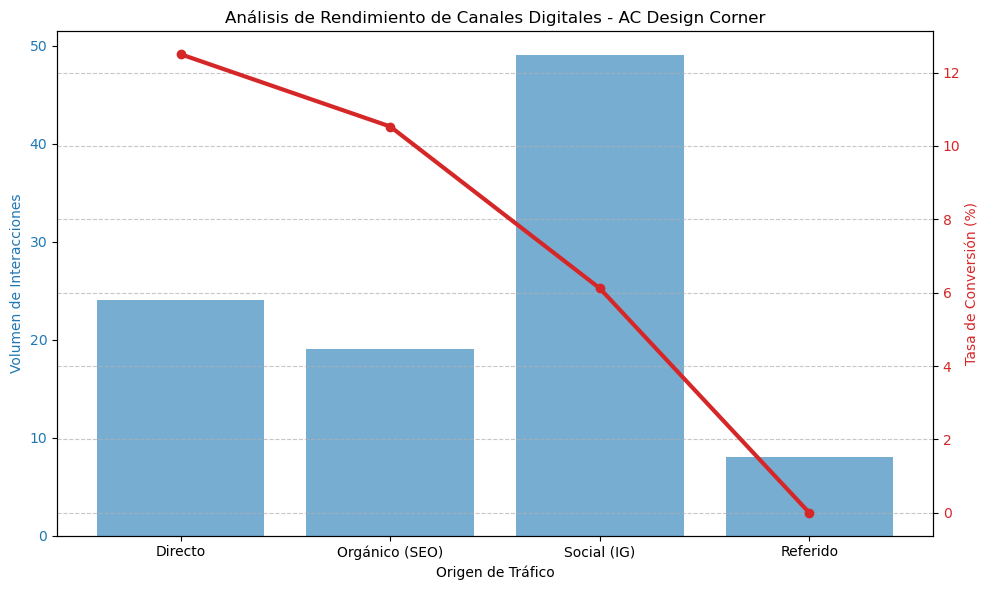

In [12]:
# 1. Definir el tamaño de la figura
fig, ax1 = plt.subplots(figsize=(10, 6))

# 2. Configurar el Eje Y principal (Barras = Volumen)
color = 'tab:blue'
ax1.set_xlabel('Origen de Tráfico')
ax1.set_ylabel('Volumen de Interacciones', color=color)
ax1.bar(analisis_trafico['origen_trafico'], analisis_trafico['volumen'], color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)

# 3. Configurar el Eje Y secundario (Línea = Tasa de Conversión)
ax2 = ax1.twinx()  # Crea un segundo eje Y que comparte el mismo Eje X
color = 'tab:red'
ax2.set_ylabel('Tasa de Conversión (%)', color=color)
ax2.plot(analisis_trafico['origen_trafico'], analisis_trafico['tasa_conversion_porc'], color=color, marker='o', linewidth=3)
ax2.tick_params(axis='y', labelcolor=color)

# 4. Título y Diseño
plt.title('Análisis de Rendimiento de Canales Digitales - AC Design Corner')
fig.tight_layout() 
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añadir una grilla para mejor lectura

# 5. Guardar y mostrar el gráfico
plt.savefig('rendimiento_canales_acdesign.png') # Guarda el gráfico
plt.show()